In [84]:
import networkx as nx
import matplotlib.pyplot as plt
import random
from gurobipy import *
from scipy.sparse import *
import numpy as np
import random

plt.rcParams['figure.figsize'] = [15, 15] ## set the size of all figures

In [85]:
G=nx.read_weighted_edgelist("WV.txt")
pos=nx.spring_layout(G)

In [86]:
print(G.number_of_nodes(), G.number_of_edges())

1896 2468


In [87]:
## 可以copy,老師講義上有的
T=nx.minimum_spanning_tree(G)

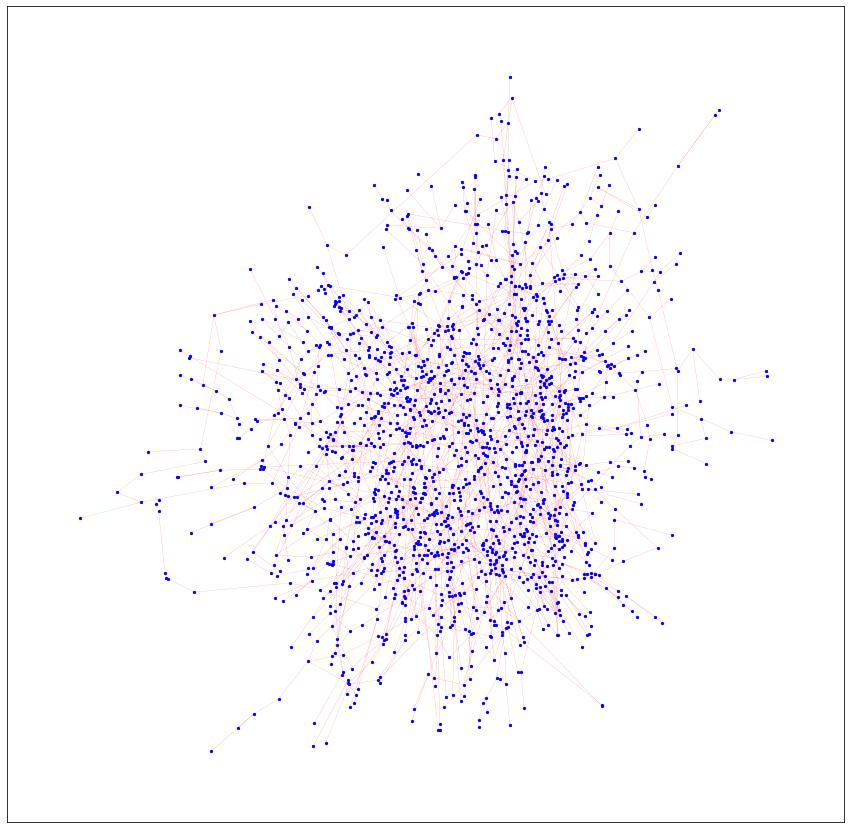

In [88]:
## 可以copy,老師講義上有的
ered=[(i,j) for (i,j) in T.edges()]
nx.draw_networkx_nodes(G,pos,nodelist=G.nodes(), node_color='b', node_size=5)
nx.draw_networkx_edges(G,pos,edgelist=ered, edge_color='r', width=0.1)

In [96]:
# random 數值: method 1
shelter=random.choices(list(T.nodes()))

In [165]:
# random 數值: method 2
shelter=list(G.nodes())[random.randint(0, len(G.nodes()))]

'151374446'

In [172]:
# random 數值: method 3 我應該會用這個_Chen Wang
shelter=random.sample(list(T.nodes()), k = 1)

['619724526']

In [100]:
## 可以copy,老師講義上有的(1) Chen Wang
totalCost_2=np.sum([nx.shortest_path_length(T, str(i), shelter[0], weight='weight') for i in T.nodes()])
print(totalCost_2)
avgCost_2=totalCost_2/(T.number_of_nodes()-1)
print(avgCost_2)
maxCost_2=np.max([nx.shortest_path_length(T, str(i), shelter[0], weight='weight') for i in T.nodes()])
print(maxCost_2)

244320318.0
128928.92770448548
362745.0


In [137]:
## 跟上面一樣的方法
totalCost = 0
for i in T.nodes():
    totalCost += nx.shortest_path_length(T, str(i), shelter[0], weight='weight')
    
totalnodes = len(G.nodes())
avgCost = totalCost/(totalnodes-1)
print(totalCost, avgCost)

244320318.0 128928.92770448548


In [113]:
## 跟上面一樣的方法
def shortest_path(G, n1):
    total = 0
    for i in G.nodes():
        path, _ = nx.bidirectional_dijkstra(G, str(i), n1[0])
        total += path
    average_path = total/(len(T.nodes)-1)
    return total, average_path

shortest_path(T, shelter)